In [15]:
import requests
import pandas as pd
import urllib.parse as urlparse
import datetime

startLocation = "37.77493,-122.419415" # San Fransisco
endLocation = "34.052234,-118.243685" # Los Angeles
API_KEY = 'a2cvZL5Hn6VUHWOBOJYMKnqD3122VWnY' # Api_key

# Base URL
base_url = "https://api.tomtom.com/routing/1/calculateRoute/"
    
today = datetime.date.today()
departure_time_start = datetime.datetime(today.year, today.month, today.day-1, 0, 0, 0)

hour_range = range(0,24)

for i in hour_range:
    # Update an hour
    departure_time = departure_time_start.replace(hour=departure_time_start.hour + i)
    
    # Format datetime string
    departure_time = departure_time.strftime('%Y-%m-%dT%H:%M:%S')
    
    # Create URL
    request_params = (
        urlparse.quote(startLocation) + ":" + urlparse.quote(endLocation) 
        + "/json?departAt=" + urlparse.quote(departure_time))
    
    request_url = base_url + request_params + "&key=" + API_KEY
    
    # Get Data
    response = requests.get(request_url)
    
    # Convert to JSON
    json_result = response.json()
    
    # Get summary
    route_summary = json_result['routes'][0]['summary']
    
    # Convert to dataframe and append
    if (i==0):
        df = pd.json_normalize(route_summary)
    df = df.append(pd.json_normalize(route_summary), ignore_index=True)
    print(f"Retrieving data: {i + 1} / {len(hour_range)}")


Retrieving data: 1 / 24
Retrieving data: 2 / 24
Retrieving data: 3 / 24
Retrieving data: 4 / 24
Retrieving data: 5 / 24
Retrieving data: 6 / 24
Retrieving data: 7 / 24
Retrieving data: 8 / 24
Retrieving data: 9 / 24
Retrieving data: 10 / 24
Retrieving data: 11 / 24
Retrieving data: 12 / 24
Retrieving data: 13 / 24
Retrieving data: 14 / 24
Retrieving data: 15 / 24
Retrieving data: 16 / 24
Retrieving data: 17 / 24
Retrieving data: 18 / 24
Retrieving data: 19 / 24
Retrieving data: 20 / 24
Retrieving data: 21 / 24
Retrieving data: 22 / 24
Retrieving data: 23 / 24
Retrieving data: 24 / 24


In [16]:
df

,lengthInMeters,travelTimeInSeconds,trafficDelayInSeconds,trafficLengthInMeters,departureTime,arrivalTime
0,659297,21132,0,0,2022-02-10T00:00:00-08:00,2022-02-10T05:52:12-08:00
1,659297,21132,0,0,2022-02-10T00:00:00-08:00,2022-02-10T05:52:12-08:00
2,656816,21402,0,0,2022-02-10T01:00:00-08:00,2022-02-10T06:56:42-08:00
3,659726,22131,0,0,2022-02-10T02:00:00-08:00,2022-02-10T08:08:51-08:00
4,658641,22099,0,0,2022-02-10T03:00:00-08:00,2022-02-10T09:08:18-08:00
5,658645,21934,0,0,2022-02-10T04:00:00-08:00,2022-02-10T10:05:33-08:00
6,658645,22019,0,0,2022-02-10T05:00:00-08:00,2022-02-10T11:06:58-08:00
7,615650,19854,0,0,2022-02-10T06:00:00-08:00,2022-02-10T11:30:53-08:00
8,620456,20069,0,0,2022-02-10T07:00:00-08:00,2022-02-10T12:34:28-08:00
9,615829,20238,0,0,2022-02-10T08:00:00-08:00,2022-02-10T13:37:18-08:00


### Visualizing data Using Matplotlib

Text(0, 0.5, 'Travel Time [h]')

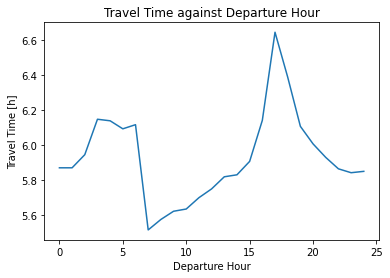

In [21]:
import matplotlib.pyplot as plt
plt.plot(df['travelTimeInSeconds'] / 3600)
plt.title('Travel Time against Departure Hour')
plt.xlabel('Departure Hour')
plt.ylabel('Travel Time [h]')

Text(0, 0.5, 'Travel Distance [KM]')

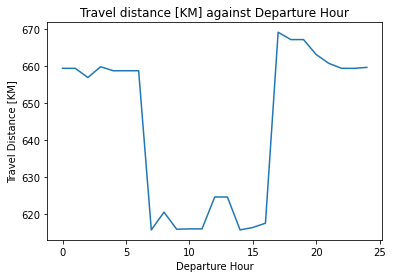

In [22]:
plt.plot(df['lengthInMeters'] / 1000)
plt.title('Travel distance [KM] against Departure Hour')
plt.xlabel('Departure Hour')
plt.ylabel('Travel Distance [KM]')